# <p style="background-color:skyblue; font-family:calibri; color:blue; font-size:150%; text-align:center; border-radius:15px 50px;">Movie Prediction Success</p>

<img src="imdb.jpeg" width="1200" height="1000">

 <div style="background-color: #191970; padding: 15px; text-align: left; width: 20%;">
      <h3 align="left"><font color="#FFD700">Problem:</font></h3>
    </div>

<div style="border-radius: 10px; padding: 15px; background-color: #2F4F4F; font-size: 120%; text-align: left;">
  
  <div style="background-color: #191970; padding: 10px;">
    <h3 align="left"><font color="#FFD700">Problem:</font></h3>
  </div>
  
  <div style="background-color: #2F4F4F; padding: 12px;">
    <h4 align="justify"><font color="#D3D3D3">
      The film industry faces significant challenges in predicting the success of movies before their release, often resulting in substantial financial risks. The client, a major film studio, seeks to leverage data analysis and machine learning to develop a predictive model that categorizes movies into "Hit," "Average," or "Flop" based on IMDb scores. The goal is to enhance decision-making in movie production, marketing strategies, and gain deeper insights into the factors influencing movie success.
    </font></h4>
  </div>

</div>


<div style="border-radius: 10px; padding: 15px; background-color: #191970; font-size: 120%; text-align: left;">
  
  <h3 align="left"><font color="#FFD700">Problem:</font></h3>
  
  <h3 align="left"><font color="#D3D3D3">
    The film industry faces significant challenges in predicting the success of movies before their release, often resulting in substantial financial risks. The client, a major film studio, seeks to leverage data analysis and machine learning to develop a predictive model that categorizes movies into "Hit," "Average," or "Flop" based on IMDb scores. The goal is to enhance decision-making in movie production, marketing strategies, and gain deeper insights into the factors influencing movie success.
  </font></h3>

</div>


Step 1 | Import Libraries


In [1]:
# Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV

# For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# For evaluation
from sklearn.metrics import confusion_matrix, classification_report, log_loss, accuracy_score

# For handling warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualizations style
sns.set(style='whitegrid')
%matplotlib inline


Step 2 | Read Dataset


In [2]:
# Reading the dataset
data = pd.read_csv('movie_metadata.csv', na_values =  ["NA", "N/A", "", " ","NaN"])

# Displaying the first few rows
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
data['color'] = data['color'].astype('object')
data['language'] = data['language'].astype('object')
data['country'] = data['country'].astype('object')
data['content_rating'] = data['content_rating'].astype('object')

In [5]:
data['color'].value_counts()

color
Color               4815
 Black and White     209
Name: count, dtype: int64

In [6]:
data.isnull().sum()


color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
data.dropna(inplace=True)


Step 3 | Dataset Overview

    Step 3.1 | Dataset Basic Information


In [8]:
# Basic Information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()


Dataset Shape: (3755, 28)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3755 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3755 non-null   object 
 1   director_name              3755 non-null   object 
 2   num_critic_for_reviews     3755 non-null   float64
 3   duration                   3755 non-null   float64
 4   director_facebook_likes    3755 non-null   float64
 5   actor_3_facebook_likes     3755 non-null   float64
 6   actor_2_name               3755 non-null   object 
 7   actor_1_facebook_likes     3755 non-null   float64
 8   gross                      3755 non-null   float64
 9   genres                     3755 non-null   object 
 10  actor_1_name               3755 non-null   object 
 11  movie_title                3755 non-null   object 
 12  num_voted_users            3755 non-null   int64  
 13  cast_total_f

Step 3.2 | Summary Statistics for Numerical Variables


In [9]:
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [10]:
# Summary Statistics for Numerical Variables
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_cols].describe()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3.755000e+03,3.755000e+03,3755.000000,3755.000000,3755.000000,3.755000e+03,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,167.392277,110.260186,807.463648,771.484953,7753.390146,5.262614e+07,1.058489e+05,11530.158988,1.377630,336.914514,4.624810e+07,2002.974434,2022.314248,6.464740,2.110951,9349.396272
std,123.465521,22.649332,3068.570417,1894.460316,15520.897163,7.032249e+07,1.520496e+05,19123.805685,2.041689,411.258897,2.260393e+08,9.888558,4545.393731,1.055865,0.353093,21464.027749
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.500000,745.000000,8.301882e+06,1.966300e+04,1920.500000,0.000000,110.000000,1.000000e+07,1999.000000,385.000000,5.900000,1.850000,0.000000
50%,139.000000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397700e+04,4060.000000,1.000000,210.000000,2.500000e+07,2004.000000,686.000000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.690181e+07,1.286110e+05,16243.000000,2.000000,398.500000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


Step 3.3 | Summary Statistics for Categorical Variables


In [11]:
# Summary Statistics for Categorical Variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data[categorical_cols].describe()


,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755,3755
unique,2,1658,2187,745,1427,3654,2586,3655,3655,33,45,12
top,Color,Steven Spielberg,Morgan Freeman,Comedy|Drama|Romance,Robert De Niro,Pan,Steve Coogan,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,3631,25,20,147,42,3,8,3,3,3598,2986,1700


Step 4 | Exploratory Data Analysis (EDA)

    Step 4.1 | Univariate Analysis
    Step 4.1.1 | Numerical Variables Univariate Analysis


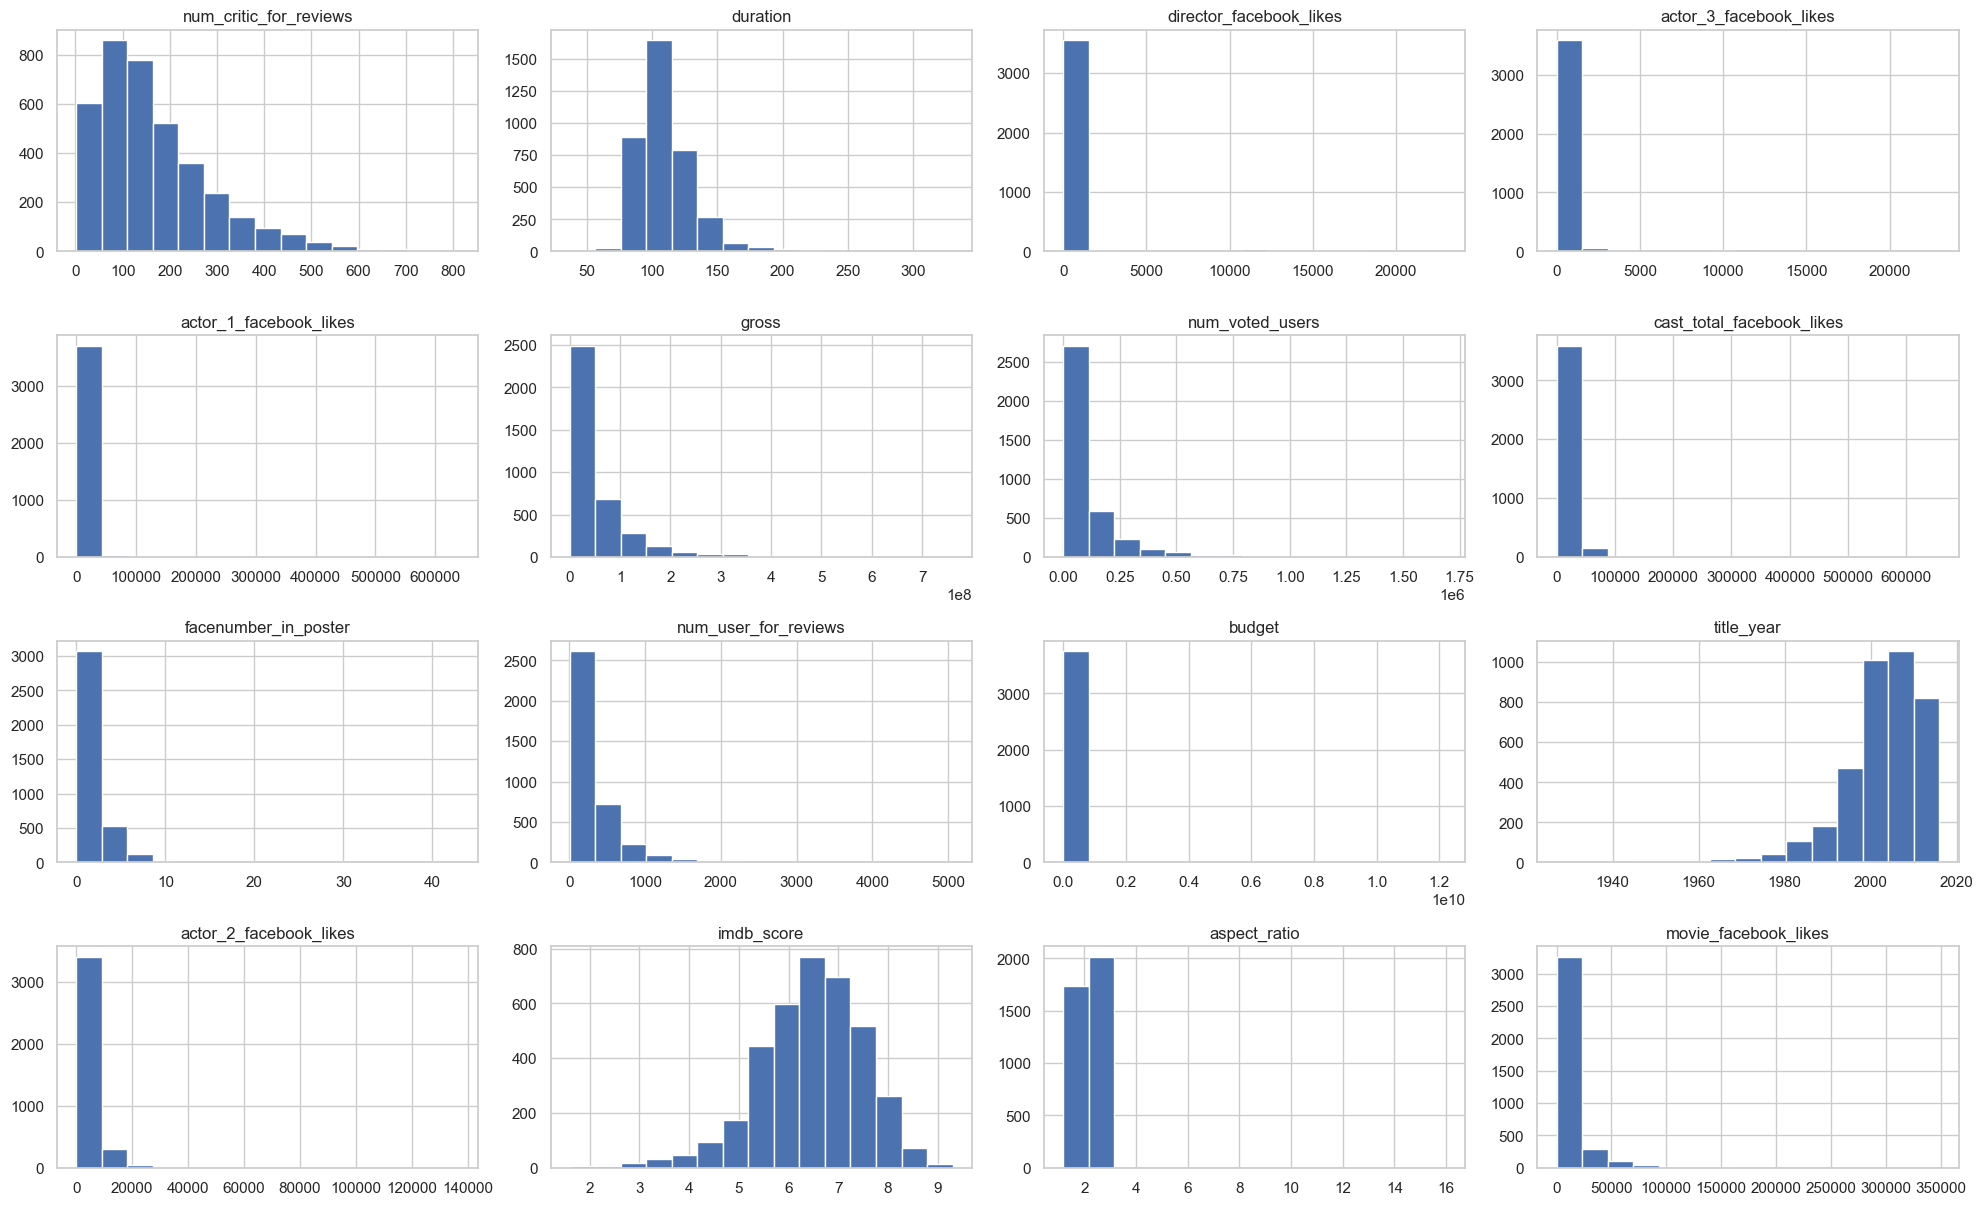

In [12]:
# Histograms for Numerical Variables
data[numerical_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4))
plt.tight_layout()
plt.show()


Step 4.1.2 | Categorical Variables Univariate Analysis


In [13]:
# # Bar plots for Categorical Variables
# for col in categorical_cols:
#     plt.figure(figsize=(10, 4))
#     sns.countplot(data[col], order=data[col].value_counts().index)
#     plt.xticks(rotation=90)
#     plt.title(f'Countplot of {col}')
#     plt.show()


1. Line Plot

    Line plots are useful for visualizing trends over a continuous variable, such as year-wise changes in average IMDB scores.



In [17]:
print(data.columns)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


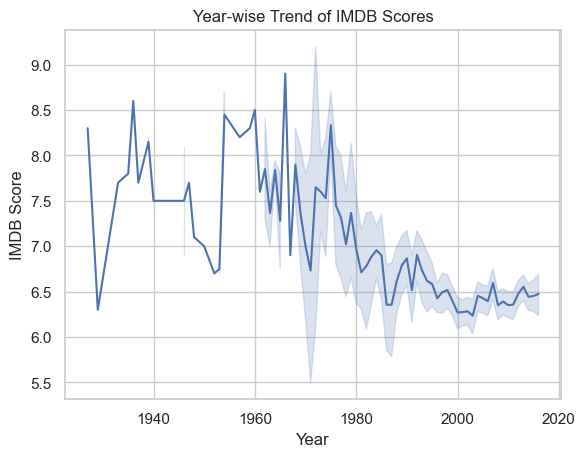

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting with 'title_year' instead of 'year'
sns.lineplot(x='title_year', y='imdb_score', data=data)  # Use the actual column name
plt.title('Year-wise Trend of IMDB Scores')
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.show()



2. Bar Plot

    Bar plots are great for comparing the count of categorical data, like the number of movies in each category (FLOP, AVG, HIT).

In [20]:
print(data.columns)


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


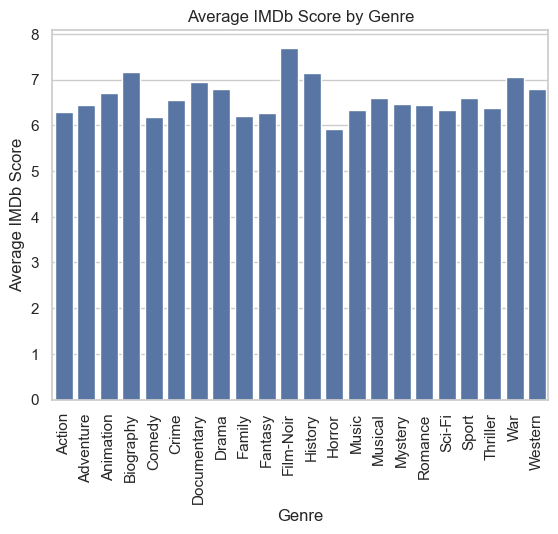

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split genres and explode the list into separate rows
data['genres'] = data['genres'].str.split('|')
data = data.explode('genres')

# Compute average IMDb score by genre
avg_imdb_scores = data.groupby('genres')['imdb_score'].mean().reset_index()

# Plot the data
sns.barplot(x='genres', y='imdb_score', data=avg_imdb_scores)
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


3. Count Plot

    Count plots are useful for displaying the count of observations in each categorical bin, such as the number of movies released each year.

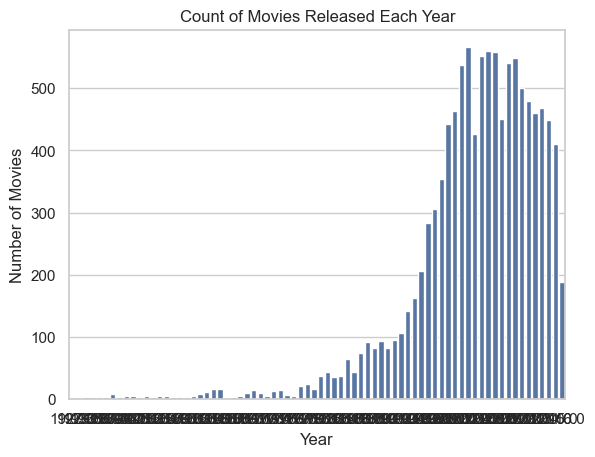

In [24]:
sns.countplot(x='title_year', data=data)
plt.title('Count of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


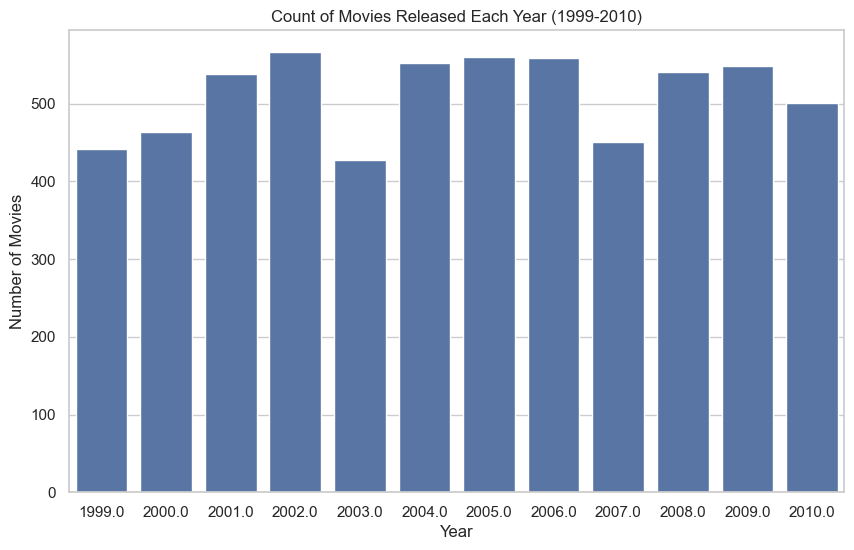

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='title_year', data=data[(data['title_year'] >= 1999) & (data['title_year'] <= 2010)])
plt.title('Count of Movies Released Each Year (1999-2010)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

4. Heatmap

    
    Heatmaps are excellent for showing correlations between numeric features, like the relationship between various features in your dataset.

In [ ]:
# corr_matrix = data.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
# plt.title('Feature Correlation Heatmap')
# plt.show()


Filter Numeric Columns:


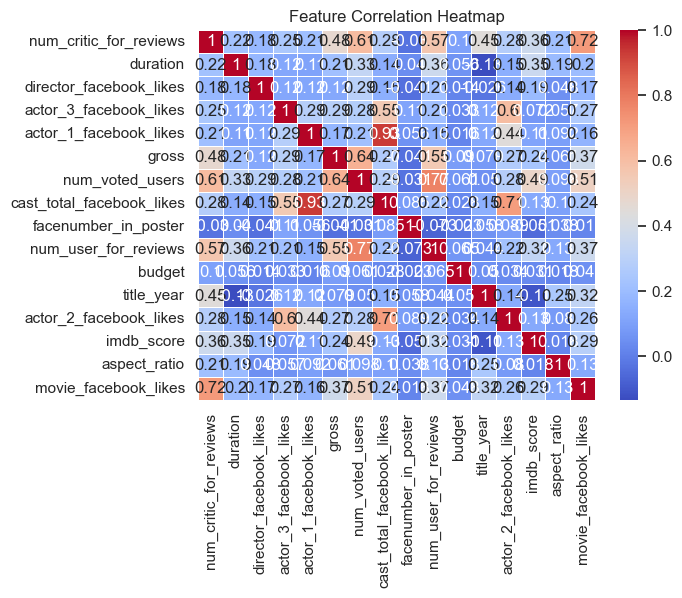

In [26]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()


Handle Categorical Columns:


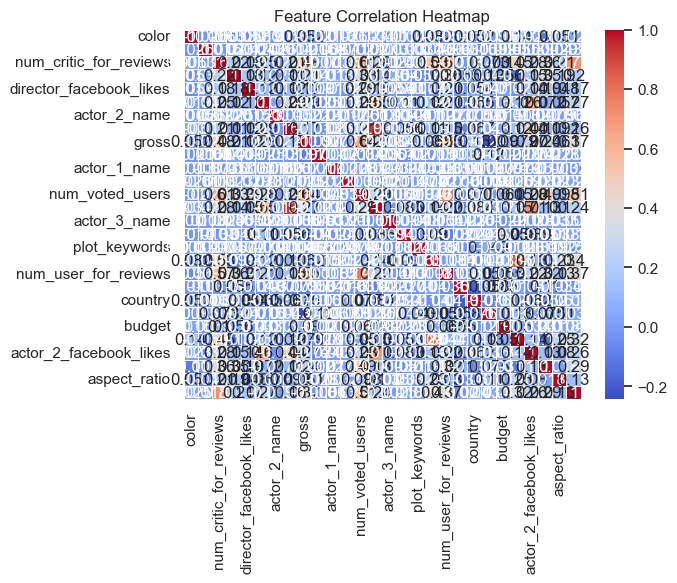

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# Encode categorical columns
for column in data.select_dtypes(include=[object]).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

# Now select only numeric columns including the newly encoded ones
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()


Step 4.2 | Bivariate Analysis

    Step 4.2.1 | Numerical Features vs Target

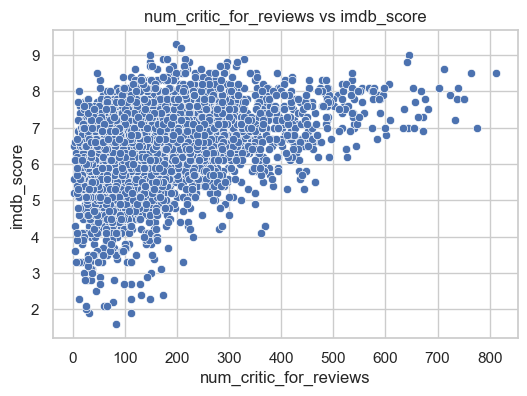

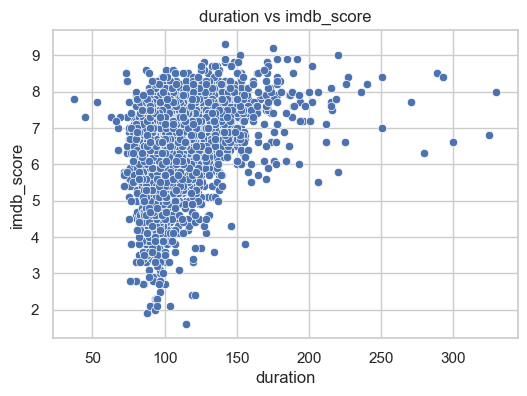

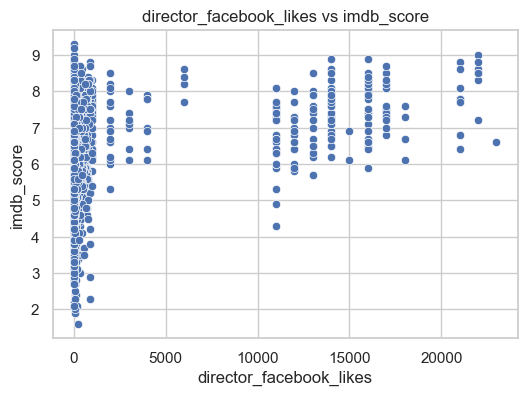

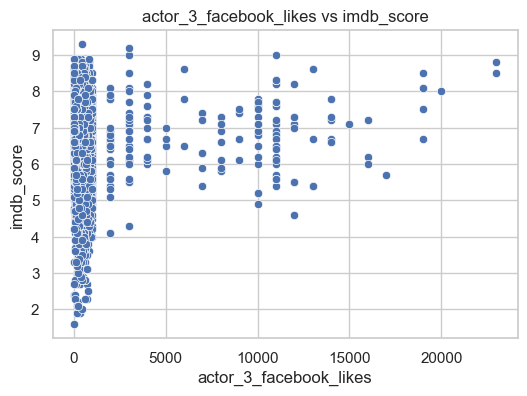

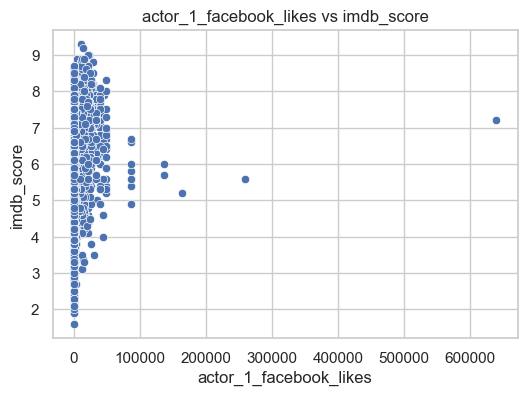

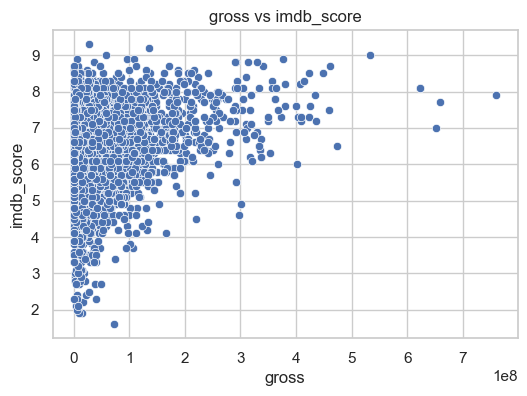

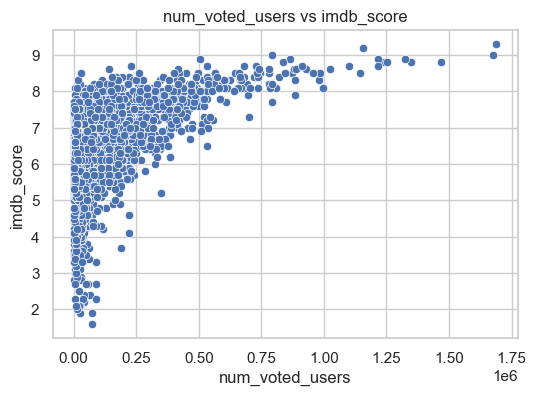

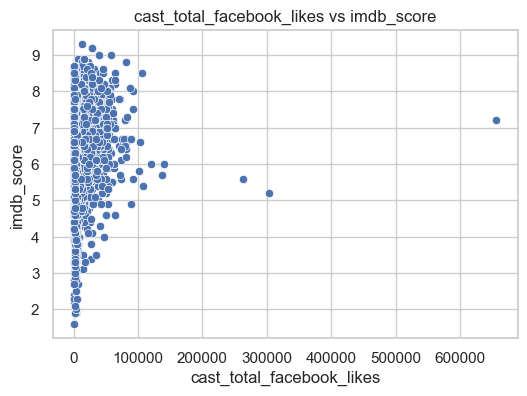

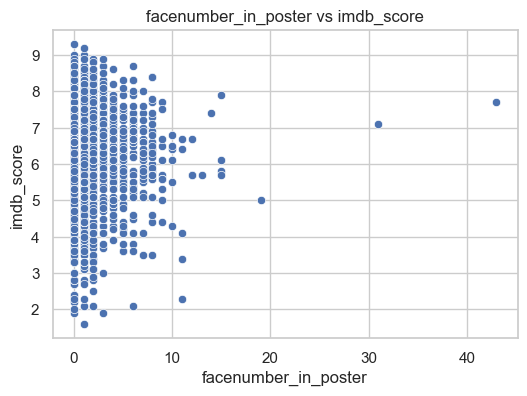

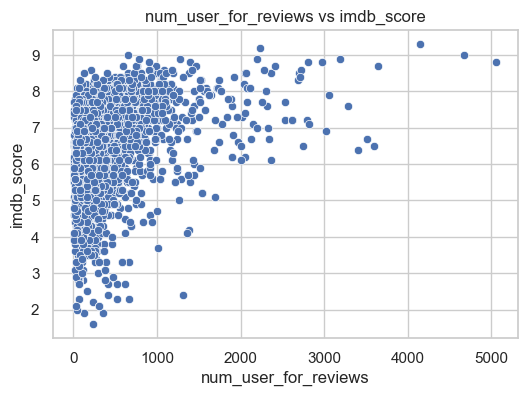

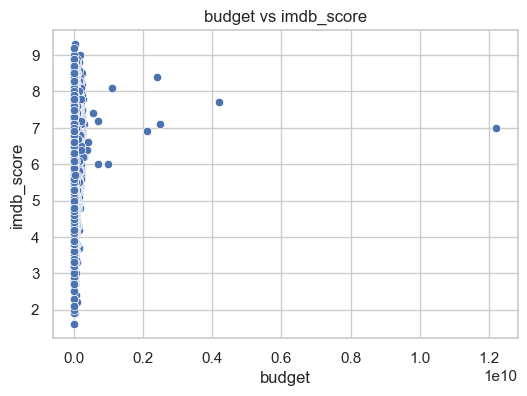

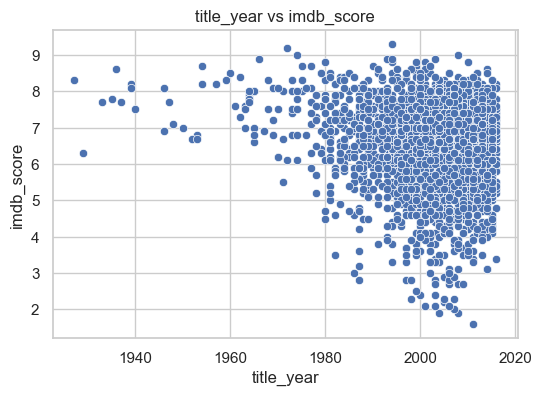

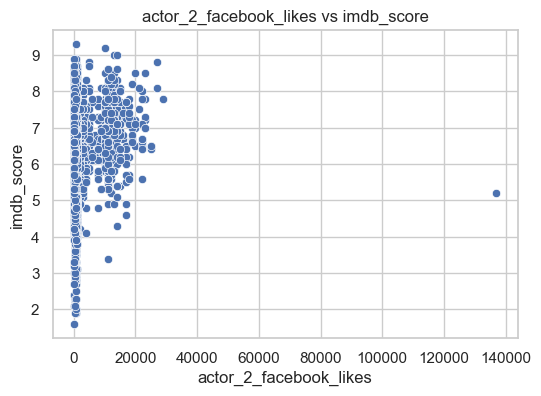

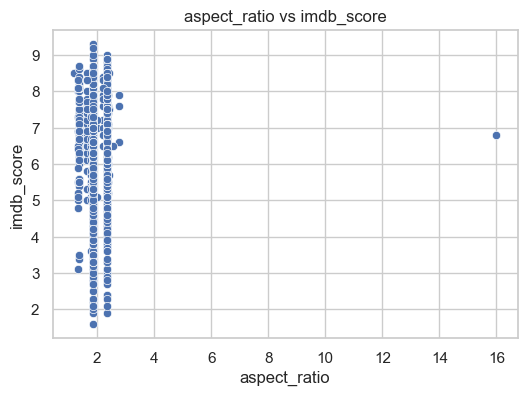

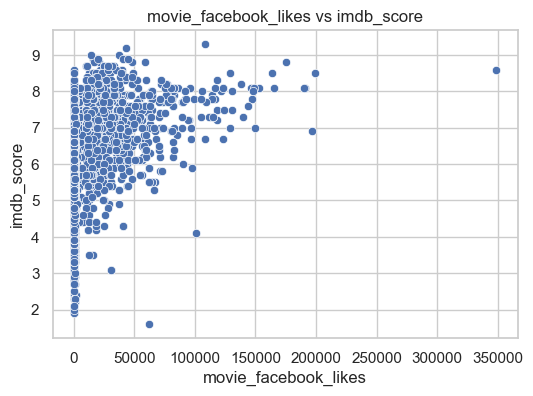

In [ ]:
# Assuming 'imdb_score' is the target variable initially
target = 'imdb_score'

# Scatter plots between numerical features and target
for col in numerical_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=data[col], y=data[target])
        plt.title(f'{col} vs {target}')
        plt.show()


Step 5 | Data Preprocessing

  Step 5.1 | Irrelevant Features Removal

In [ ]:
# Dropping irrelevant columns
irrelevant_cols = ['movie_title', 'movie_imdb_link']
data.drop(columns=irrelevant_cols, inplace=True)
print("Columns after removal:", data.columns.tolist())


Columns after removal: ['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


Step 5.2 | Missing Value Treatment


In [ ]:
# Total null values present in each column
print("Missing Values per Column:")
print(data.isnull().sum())

# Dropping samples that have missing values
data.dropna(inplace=True)
print("Shape after dropping missing values:", data.shape)


Missing Values per Column:
color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64
Shape after dropping missing values: (3755, 26)


Step 5.3 | Outlier Treatment


In [ ]:
# Handling outliers using IQR for numerical variables
for col in numerical_cols:
    if col != target:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
print("Shape after outlier removal:", data.shape)


Shape after outlier removal: (1569, 26)


Step 5.4 | Categorical Features Encoding


In [ ]:
# Label Encoding the categorical columns
le = LabelEncoder()
cat_list = ['color', 'director_name', 'actor_2_name',
            'genres', 'actor_1_name', 'actor_3_name',
            'plot_keywords', 'language', 'country',
            'content_rating', 'title_year', 'aspect_ratio']

for col in cat_list:
    data[col] = le.fit_transform(data[col].astype(str))

print("Data after label encoding:")
data.head()


Data after label encoding:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
324,1,218,97.0,110.0,342.0,393.0,365,623.0,10200000.0,411,...,263.0,5,36,3,10000000.0,13,508.0,7.3,6,578
370,1,112,269.0,121.0,0.0,919.0,1110,10000.0,83077470.0,388,...,440.0,5,36,4,75000000.0,24,1000.0,7.1,6,0
377,1,970,227.0,128.0,521.0,249.0,400,591.0,72515360.0,361,...,411.0,0,35,4,80000000.0,21,249.0,6.4,9,0
381,1,815,64.0,116.0,176.0,84.0,778,192.0,61355436.0,54,...,184.0,5,36,4,68000000.0,13,117.0,6.2,9,0
407,1,93,236.0,104.0,420.0,535.0,385,2000.0,78009155.0,66,...,194.0,5,36,4,75000000.0,27,906.0,6.2,9,0


Step 5.5 | Feature Scaling


In [ ]:
# Feature Scaling
sc = StandardScaler()
data_scaled = data.copy()
data_scaled[numerical_cols] = sc.fit_transform(data_scaled[numerical_cols])
print("Data after scaling:")
data_scaled.head()


Data after scaling:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
324,1,218,-0.018009,0.531150,2.354518,0.085184,365,-0.501674,-0.521562,411,...,0.924161,5,36,3,-0.635706,-0.785670,-0.119338,1.198816,-0.681283,0.890686
370,1,112,2.773569,1.306054,-0.754674,2.104193,1110,1.290384,2.161234,388,...,2.481625,5,36,4,2.711415,0.878731,1.510543,1.002884,-0.681283,-0.631733
377,1,970,2.091905,1.799175,3.981844,-0.467548,400,-0.507790,1.772417,361,...,2.226447,0,35,4,2.968886,0.424804,-0.977344,0.317124,0.993285,-0.631733
381,1,815,-0.553603,0.953825,0.845378,-1.100888,778,-0.584043,1.361593,54,...,0.229021,5,36,4,2.350956,-0.785670,-1.414629,0.121193,0.993285,-0.631733
407,1,93,2.237976,0.108475,3.063632,0.630240,385,-0.238513,1.974657,66,...,0.317014,5,36,4,2.711415,1.332658,1.199143,0.121193,0.993285,-0.631733


Step 5.6 | Transforming Skewed Features


In [ ]:
# Identifying skewed numerical features
skewed_feats = data_scaled[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewness of numerical features:\n", skewed_feats)

# Applying log transformation to skewed features
from scipy.stats import boxcox
for col in skewed_feats.index:
    if abs(skewed_feats[col]) > 0.5:
        # Adding 1 to avoid log(0)
        data_scaled[col] = np.log1p(data_scaled[col])

print("Data after log transformation of skewed features:")
data_scaled.head()


Skewness of numerical features:
 actor_1_facebook_likes       2.054137
movie_facebook_likes         1.947212
director_facebook_likes      1.841896
cast_total_facebook_likes    1.811561
num_voted_users              1.726557
gross                        1.524833
facenumber_in_poster         1.109476
num_user_for_reviews         1.064947
budget                       1.061884
num_critic_for_reviews       0.998606
duration                     0.688587
actor_3_facebook_likes       0.398731
actor_2_facebook_likes      -0.145358
title_year                  -0.406429
aspect_ratio                -0.719892
imdb_score                  -0.829863
dtype: float64
Data after log transformation of skewed features:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
324,1,218,-0.018173,0.426019,1.210308,0.085184,365,-0.696501,-0.737228,411,...,0.654490,5,36,3,-1.009793,-0.785670,-0.119338,0.787919,-1.143451,0.636940
370,1,112,1.328021,0.835538,-1.405169,2.104193,1110,0.828719,1.150962,388,...,1.247499,5,36,4,1.311413,0.878731,1.510543,0.694588,-1.143451,-0.998948
377,1,970,1.128787,1.029325,1.605800,-0.467548,400,-0.708849,1.019719,361,...,1.171382,0,35,4,1.378485,0.424804,-0.977344,0.275451,0.689784,-0.998948
381,1,815,-0.806546,0.669789,0.612684,-1.100888,778,-0.877174,0.859336,54,...,0.206218,5,36,4,1.209246,-0.785670,-1.414629,0.114393,0.689784,-0.998948
407,1,93,1.174948,0.102985,1.402077,0.630240,385,-0.272482,1.090129,66,...,0.275367,5,36,4,1.311413,1.332658,1.199143,0.114393,0.689784,-0.998948


Step 6 | Feature Selection

  Step 6.1 | Recursive Feature Elimination with Cross-Validation (RFECV)

In [ ]:
data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

-------

Optimal number of features : 21
Selected features indices: [False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
 False]


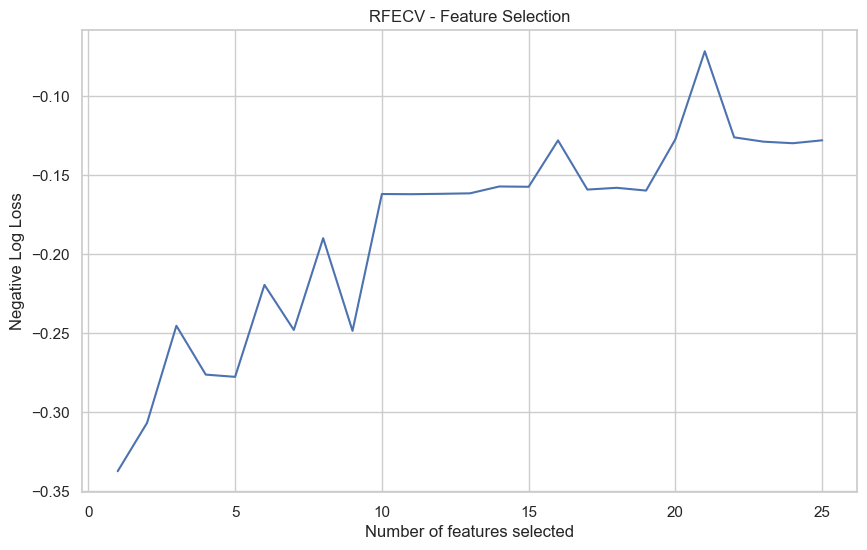

In [ ]:
# Categorizing the target variable
bins = [1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data_scaled['imdb_binned'] = pd.cut(data_scaled['imdb_score'], bins=bins, labels=labels)

# Encoding the target variable
data_scaled['imdb_binned'] = LabelEncoder().fit_transform(data_scaled['imdb_binned'])

# Dropping the original target
data_scaled.drop(columns=['imdb_score'], inplace=True)

# Defining X and y
X = data_scaled.drop('imdb_binned', axis=1).values
y = data_scaled['imdb_binned'].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# # Scaling
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy like 'median'

# Fit and transform on training data
X_train = imputer.fit_transform(X_train)

# Only transform on test data
X_test = imputer.transform(X_test)


# Recursive Feature Elimination with Cross-Validation
clf_rf = RandomForestClassifier(random_state=0)
rfecv = RFECV(estimator=clf_rf, step=1, cv=5, scoring='neg_log_loss')
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
selected_features = rfecv.support_
print('Selected features indices:', selected_features)

# Plotting RFECV results
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Negative Log Loss")
plt.title("RFECV - Feature Selection")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Selecting the important features
X_train_opt = rfecv.transform(X_train)
X_test_opt = rfecv.transform(X_test)


----------------------

In [ ]:
# X_train

Step 6.2 | Feature Importance Analysis


In [ ]:
# # Fitting the model to get feature importances
# clf_rf.fit(X_train, y_train)
# importances = clf_rf.feature_importances_

# # Getting feature names
# feature_names = data_scaled.drop('imdb_binned', axis=1).columns
# selected_feature_names = feature_names[selected_features]

# # Creating a DataFrame for feature importances
# feat_imp = pd.DataFrame({'Feature': selected_feature_names, 'Importance': importances})
# feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

# # Bar plot for feature importances
# plt.figure(figsize=(12,8))
# plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='#1976D2')
# plt.title('RFECV - Feature Importances', fontsize=16)
# plt.xlabel('Importance', fontsize=14)
# plt.show()


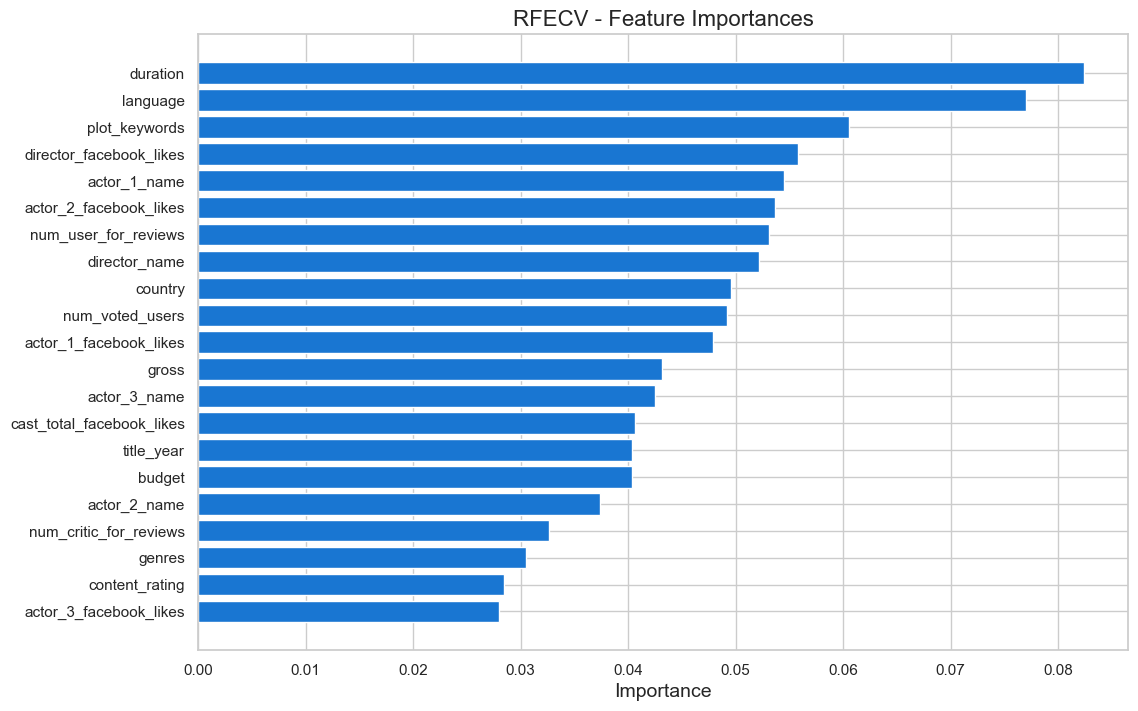

In [ ]:
# Fitting the model to get feature importances
clf_rf.fit(X_train_opt, y_train) #Fitting the model with the optimal features
importances = clf_rf.feature_importances_

# Getting feature names
feature_names = data_scaled.drop('imdb_binned', axis=1).columns
selected_feature_names = feature_names[selected_features]

# Creating a DataFrame for feature importances
feat_imp = pd.DataFrame({'Feature': selected_feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=True)

# Bar plot for feature importances
plt.figure(figsize=(12,8))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.show()

Step 7 | Random Forest Model Building

  Step 7.1 | RF Base Model Definition

In [ ]:
# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)


Step 7.2 | RF Model Training


In [ ]:
# Training the Random Forest Classifier
rf_classifier.fit(X_train_opt, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

Step 7.3 | RF Model Evaluation


In [ ]:
# Predicting on Test Data
y_pred_rf = rf_classifier.predict(X_test_opt)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", cm_rf)

# Classification Report
cr_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n", cr_rf)

# Accuracy Score
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")


Confusion Matrix for Random Forest:
 [[  0   4]
 [  0 467]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.99      1.00      1.00       467

    accuracy                           0.99       471
   macro avg       0.50      0.50      0.50       471
weighted avg       0.98      0.99      0.99       471

Random Forest Accuracy: 0.99


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring='accuracy')

# Fit the model with GridSearchCV
grid_search.fit(X_train_opt, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters found by GridSearchCV:\n", best_params)

# Use the best model
best_rf_classifier = grid_search.best_estimator_

# Predict on Test Data with the best model
y_pred_best_rf = best_rf_classifier.predict(X_test_opt)

# Confusion Matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix for Best Random Forest:\n", cm_best_rf)

# Classification Report
cr_best_rf = classification_report(y_test, y_pred_best_rf)
print("Classification Report for Best Random Forest:\n", cr_best_rf)

# Accuracy Score
acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {acc_best_rf:.2f}")


Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


KeyboardInterrupt: 

Step 8 | Decision Tree Model Building
Step 8.1 | DT Base Model Definition

In [ ]:
# Initializing Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)


Step 8.2 | DT Hyperparameter Tuning


In [ ]:
# Defining parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fitting GridSearchCV
grid_search_dt.fit(X_train_opt, y_train)

# Best parameters
best_params_dt = grid_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


Step 8.3 | DT Model Evaluation


In [ ]:
# Best Decision Tree Classifier
best_dt = grid_search_dt.best_estimator_

# Predicting on Test Data
y_pred_dt = best_dt.predict(X_test_opt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree:\n", cm_dt)

# Classification Report
cr_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree:\n", cr_dt)

# Accuracy Score
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")


Confusion Matrix for Decision Tree:
 [[  1   3]
 [  1 466]]
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.99      1.00      1.00       467

    accuracy                           0.99       471
   macro avg       0.75      0.62      0.66       471
weighted avg       0.99      0.99      0.99       471

Decision Tree Accuracy: 0.99


Step 9 | Logistic Regression Model Building


Step 9.1 | Logistic Base Model Definition

In [ ]:
# Initializing Logistic Regression Classifier
lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=0)


Step 9.2 | Logistic Hyperparameter Tuning


In [ ]:
# Defining parameter grid for GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Initializing GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr_classifier, param_grid=param_grid_lr,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fitting GridSearchCV
grid_search_lr.fit(X_train_opt, y_train)

# Best parameters
best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


Step 9.3 | Logistic Model Evaluation


In [ ]:
# Best Logistic Regression Classifier
best_lr = grid_search_lr.best_estimator_

# Predicting on Test Data
y_pred_lr = best_lr.predict(X_test_opt)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:\n", cm_lr)

# Classification Report
cr_lr = classification_report(y_test, y_pred_lr)
print("Classification Report for Logistic Regression:\n", cr_lr)

# Accuracy Score
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")


Confusion Matrix for Logistic Regression:
 [[  0   4]
 [  0 467]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.99      1.00      1.00       467

    accuracy                           0.99       471
   macro avg       0.50      0.50      0.50       471
weighted avg       0.98      0.99      0.99       471

Logistic Regression Accuracy: 0.99


Step 10 | Support Vector Machine (SVM) Model Building

    Step 10.1 | SVM Base Model Definition

In [ ]:
# Initializing Support Vector Classifier
svm_classifier = SVC(probability=True, random_state=0)


Step 10.2 | SVM Hyperparameter Tuning


In [ ]:
# Defining parameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initializing GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fitting GridSearchCV
grid_search_svm.fit(X_train_opt, y_train)

# Best parameters
best_params_svm = grid_search_svm.best_params_
print("Best Parameters for SVM:", best_params_svm)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


Step 10.3 | SVM Model Evaluation


In [ ]:
# Best SVM Classifier
best_svm = grid_search_svm.best_estimator_

# Predicting on Test Data
y_pred_svm = best_svm.predict(X_test_opt)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", cm_svm)

# Classification Report
cr_svm = classification_report(y_test, y_pred_svm)
print("Classification Report for SVM:\n", cr_svm)

# Accuracy Score
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.2f}")


Confusion Matrix for SVM:
 [[  0   4]
 [  0 467]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.99      1.00      1.00       467

    accuracy                           0.99       471
   macro avg       0.50      0.50      0.50       471
weighted avg       0.98      0.99      0.99       471

SVM Accuracy: 0.99
